In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime
import gzip
import matplotlib.gridspec as gridspec

from spacepy import coordinates as coord
from spacepy.time import Ticktock

from methods.raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D

import methods.xflib as xflib

xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/WIPP_stencils/python/methods/libxformd.so')

R2D = 180./np.pi
D2R = np.pi/180.
#%matplotlib inline
%matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 18,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

In [123]:
infile = '/shared/users/asousa/WIPP/WIPP_stencils/outputs/scattering/nightside/ngo_debug_again4/scattering_inlat_35.pklz'

with gzip.open(infile,'r') as file:
    data = pickle.load(file)

['Lshells', 'Emin', 'Emax', 'NUM_E', 'E_tot_arr', 'tvec', 'v_tot_arr']
(4, 1, 512, 1001)
3.0
(1000,) (512,)


<IPython.core.display.Javascript object>


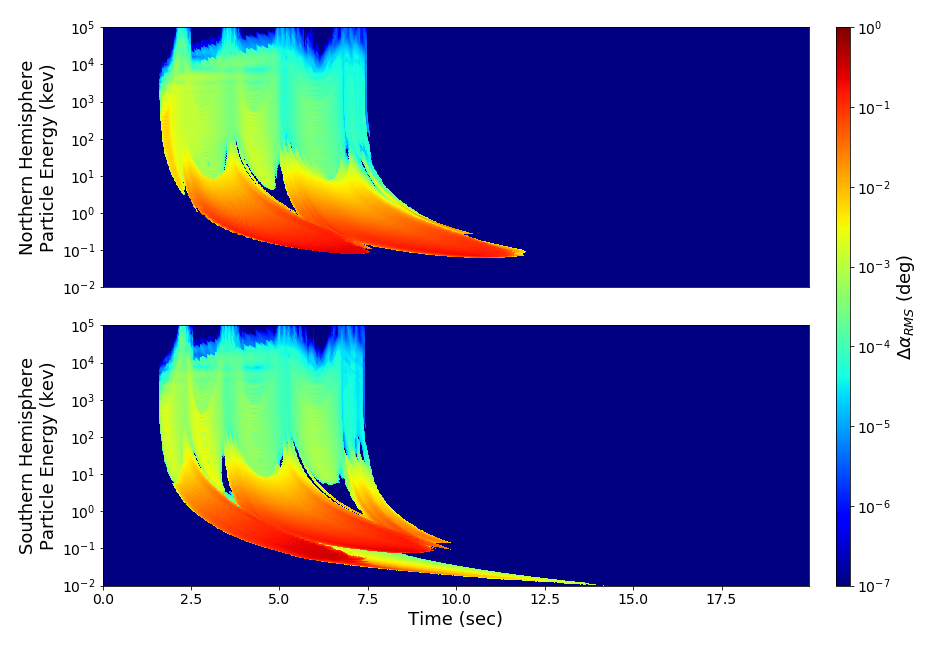

-0.499402549339 -100.0


In [124]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 18,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
# print data.keys()
da_N = data['da_N']
da_S = data['da_S']
Lshells = data['params']['Lshells']
tvec    = data['params']['tvec']
evec    = data['params']['E_tot_arr']

print data['params'].keys()
print np.shape(da_N)
L_ind = 2
lon_ind = 0
# for lon_ind in range(20):
print Lshells[L_ind]

clims = [-7, 0]
print np.shape(tvec), np.shape(evec)

fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1, 0.02])
print gs
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[1,0])
cbax = plt.subplot(gs[:,-1])
cmap = plt.get_cmap('jet')

# Ndata = np.log10(np.sqrt(np.sum(da_N[L_ind-1:L_ind + 2, :,:-1], axis=0))*R2D)
Ndata = np.log10(np.sqrt(da_N[L_ind, lon_ind, :,:-1])*R2D)
Ndata[np.isinf(Ndata)] = -100
print np.max(Ndata), np.min(Ndata)
Sdata = np.log10(np.sqrt(da_S[L_ind, lon_ind, :,:-1])*R2D)
Sdata[np.isinf(Sdata)] = -100
# print np.max(Sdata), np.min(Sdata)
p0 = ax0.pcolormesh(tvec, np.log10(evec/1000.), Ndata, vmin = clims[0], vmax=clims[1], cmap = cmap)
p1 = ax1.pcolormesh(tvec, np.log10(evec/1000.), Sdata, vmin = clims[0], vmax=clims[1], cmap = cmap)

ax0.set_xticks([])
ytix = ax0.get_yticks()
yticklabels = ['$10^{%d}$'%k for k in ytix]
ax0.set_yticklabels(yticklabels)
ytix = ax1.get_yticks()
yticklabels = ['$10^{%d}$'%k for k in ytix]
ax1.set_yticklabels(yticklabels)

ax0.set_ylabel('Northern Hemisphere\nParticle Energy (kev)')
ax1.set_ylabel('Southern Hemisphere\nParticle Energy (kev)')
ax1.set_xlabel('Time (sec)')

cb = plt.colorbar(p0, cax=cbax)
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)
cb.set_label('$\Delta \\alpha_{RMS}$ (deg)')

fig.tight_layout()
# ax[0].pcolormesh(Ndata, origin='lower',interpolation='none')

In [347]:
# Check psi angle calculation
C = 2.998e8
rdir = '/shared/users/asousa/WIPP/rays/2d/nightside/ngo_v2/'
rayze = read_rayfiles(rdir, 200, 45, 45, 0, 360)

rf = rayze[0]


print np.asarray(n)[0,:]
mu = np.linalg.norm(n, axis=1)

B = np.asarray(rf['B0'])
print B[0,:]
Bnorm = np.linalg.norm(B, axis=1)
Bhat = B/Bnorm[:,np.newaxis]


a = np.asarray(n)[0,:]
b = B[0,:]
angle = np.arctan2(np.linalg.norm(np.cross(a, b)), np.dot(a, b))*R2D
print "Correct starting angle:", angle


kvec = n*rf['w']/C
kz = np.sum(kvec*Bhat, axis=1)  # dot product of rows
kx = np.linalg.norm(np.cross(kvec, Bhat), axis=1)

# kz = -1.*np.sum(kvec*Bhat, axis=1)  # dot product of rows
# kx = np.linalg.norm(kvec + Bhat*kz[:,np.newaxis], axis=1)
psi = np.arctan2(kx, kz)
print R2D*psi



[-18.75831774  78.85150626  81.05204824]
[  6.99455733e-06  -2.94019629e-05  -1.00741657e-05]
Correct starting angle: 153.434949553
200.101442904
0      153.434950
1      153.540505
2      153.648034
3      153.785291
4      153.961444
5      154.189091
6      154.485880
7      154.877223
8      155.400764
9      156.114306
10     157.110200
11     158.541360
12     160.663557
13     163.178203
14     165.435879
15     167.818282
16     169.727959
17     170.912816
18     171.617964
19     171.730650
20     171.781838
21     171.794634
22     171.830741
23     171.909158
24     172.011263
25     172.150881
26     172.331220
27     172.558525
28     172.841518
29     173.191081
          ...    
630     87.383270
631     87.131301
632     86.879450
633     86.629848
634     86.384439
635     86.146746
636     85.918081
637     85.700505
638     85.496510
639     85.309325
640     85.139639
641     84.988998
642     84.858688
643     84.750496
644     84.665572
645     84.604196
646     

In [ ]:
# psi at launch: calculated for comparison

lat = 45

launch_dir = [np.cos(D2R*lat), 0, np.sin(D2R*lat)]
# launch_dir = [np.cos(D2R*lat), 0, np.sin(D2R*lat)]
print launch_dir
L = pow(np.cos(D2R*lat),-2.0);
Bo = -3.12e-5
theta = (90. - lat)*D2R;
phi   = 0

Bor3 = -Bo*pow(L, -3.0);

Brad = -2.0*Bor3*np.cos(theta);
Btheta = -1.0*Bor3*np.sin(theta);
Bphi = 0.0

Bcar = xf.transform_data_sph2car(lat, 0, [Brad, Btheta, Bphi])
Bdir = Bcar/np.linalg.norm(Bcar)

angle = np.arctan2(np.linalg.norm(np.cross(launch_dir, Bdir)), np.dot(launch_dir, Bdir))*R2D

print angle

In [373]:
with gzip.open('../../lightning_power_study/outputs/input_powers/input_energy_51_12.pklz','r') as file:
    db = pickle.load(file)
print np.sum(db.values())

8685.17166411


[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5]
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5]
(32, 40, 40)
(40,)
(40,)
(32,)
[   215.    250.    295.    345.    405.    475.    555.    650.    760.
    890.   1040.   1215.   1420.   1660.   1940.   2270.   2655.   3105.
   3635.   4250.   4970.   5815.   6800.   7950.   9300.  10875.  12715.
  14875.  17395.  20340.  23790.  27825.]


<IPython.core.display.Javascript object>


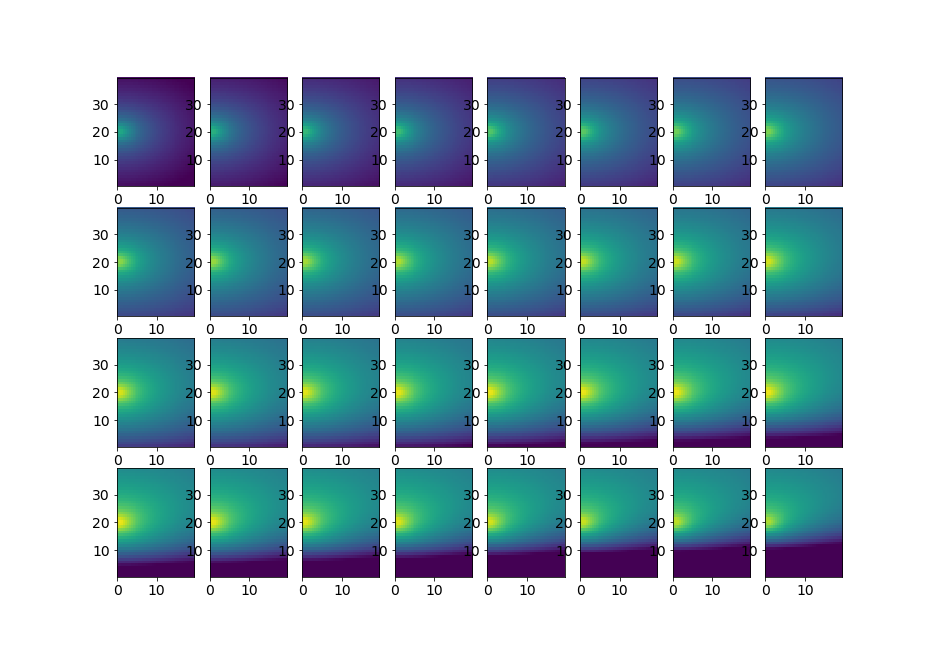

22495.9739668


In [9]:
with gzip.open('../outputs/input_energies_0.5deg/input_energy_20_0.pklz','r') as file:
    db = pickle.load(file)
print db['clats']
print db['clons']
print np.shape(db['pwr'])
print np.shape(db['clats'])
print np.shape(db['clons'])
print np.shape(db['cfreqs'])
print db['cfreqs']
fig, ax = plt.subplots(4,8)

ax = ax.flatten()
for ind in range(0,32):

    ax[ind].pcolorfast(db['clons'], db['clats'],np.log10(db['pwr'][ind,:,:]), vmin=-12, vmax=-6)
#     ax[ind].pcolorfast(db['clons'], db['clats'],db['pwr'][ind,:,:] ==0)
print np.sum(db['pwr'])*pow(10000,2)

(4, 5, 512, 1001)
(4, 5, 512, 1001)
5858349
0


<IPython.core.display.Javascript object>


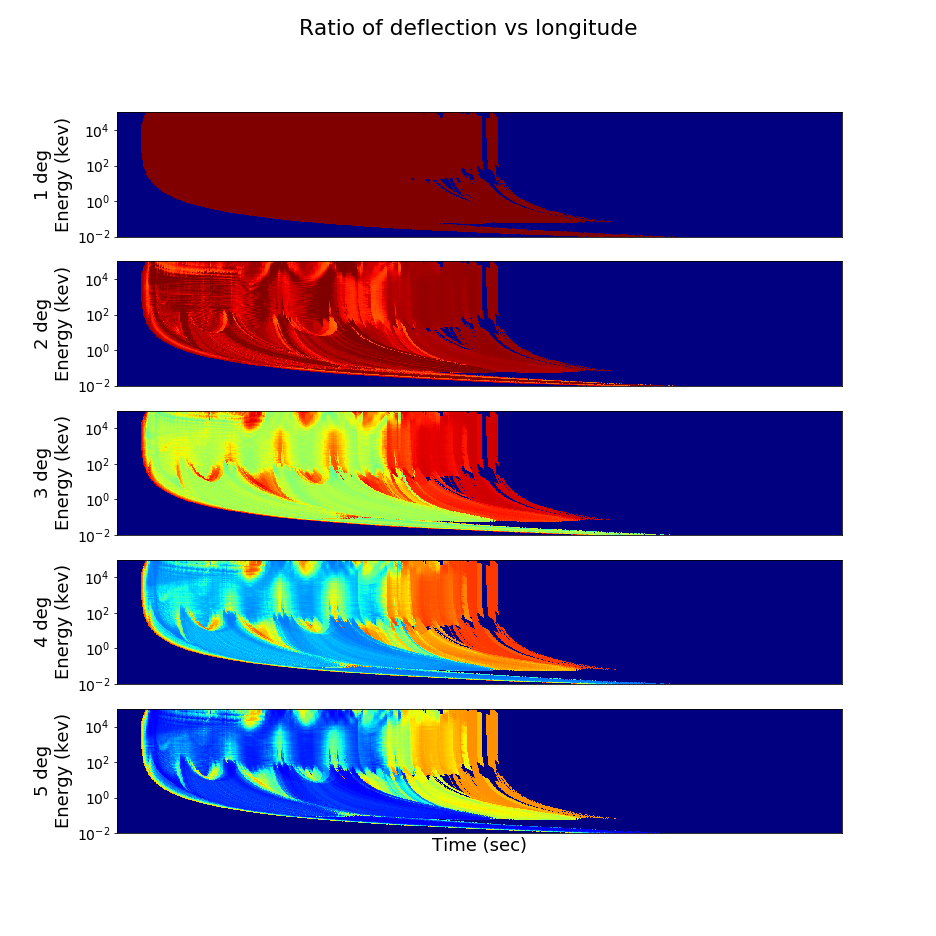

In [520]:
# Look at scaling across longitude axis:
print np.shape(da_N)

tmp = pow(10,np.log10(da_N) - np.log10(da_N[:,0,:,:][:,np.newaxis,:,:]))
# tmp = da_N - da_N[:,0,:,:][:,np.newaxis,:,:]


print np.shape(tmp)
print np.sum(np.isnan(tmp))

tmp[da_N == 0] = 0
print np.sum(np.isnan(tmp))


# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 12
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 18,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------
fig, ax = plt.subplots(np.shape(tmp)[1])
L_ind = 1
for x in range(np.shape(tmp)[1]):
    plotdata = tmp[L_ind, x, :,:-1].squeeze()
    p0 = ax[x].pcolormesh(tvec, np.log10(evec/1000.), plotdata, vmin = 0, vmax=1, cmap = cmap)

    ytix = ax[x].get_yticks()
    yticklabels = ['$10^{%d}$'%k for k in ytix]
    ax[x].set_yticklabels(yticklabels)
    
    ax[x].set_ylabel('%d deg\nEnergy (kev)'%(x+1))
for k in range(np.shape(tmp)[1]):
    ax[k].set_xticks([])

ax[-1].set_xlabel('Time (sec)')
fig.suptitle('Ratio of deflection vs longitude')

In [517]:
from scipy import sparse
# Do a quick test of sparse file saving ideas:
ndims = len(np.shape(da_N))

# Do the last two dimensions as sparse matrices, and dictionaries for the previous leading dims:

spM = dict()

# for v0 in range(np.shape(da_N)[0]):
#     for v1 in range(np.shape(da_N)[1]):
#         key = (v0, v1)
#         spM[key] = sparse.lil_matrix(da_N[v0,v1,:,:])

# a,b,c,d = np.where(da_N != 0)

# locs = zip(a,b,c,d)

# for key in locs:
#     spM[key] = da_N[key]
# with open("sparsefile2.pkl",'w') as file:
#     pickle.dump(spM, file)
    
# with open("fullfile.pkl",'w') as file:
#     pickle.dump(da_N, file)

# with gzip.open("zippedfile.pklz",'w') as file:
#     pickle.dump(da_N, file)

KeyboardInterrupt: 

['pwr', 'I0', 'clats', 'flash_mlt', 'flash_lat', 'clons', 'cfreqs']
[   215.    250.    295.    345.    405.    475.    555.    650.    760.
    890.   1040.   1215.   1420.   1660.   1940.   2270.   2655.   3105.
   3635.   4250.   4970.   5815.   6800.   7950.   9300.  10875.  12715.
  14875.  17395.  20340.  23790.  27825.]
[   215.    250.    295.    345.    405.    475.    555.    650.    760.
    890.   1040.   1215.   1420.   1660.   1940.   2270.   2655.   3105.
   3635.   4250.   4970.   5815.   6800.   7950.   9300.  10875.  12715.
  14875.  17395.  20340.  23790.  27825.]
[ 15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5  24.5  25.5  26.5
  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5  36.5  37.5  38.5
  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5  48.5  49.5  50.5
  51.5  52.5  53.5  54.5]
[ 25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5  36.5
  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5]
[  2.56376251e-09   3.03711059e-09   3.431

<IPython.core.display.Javascript object>


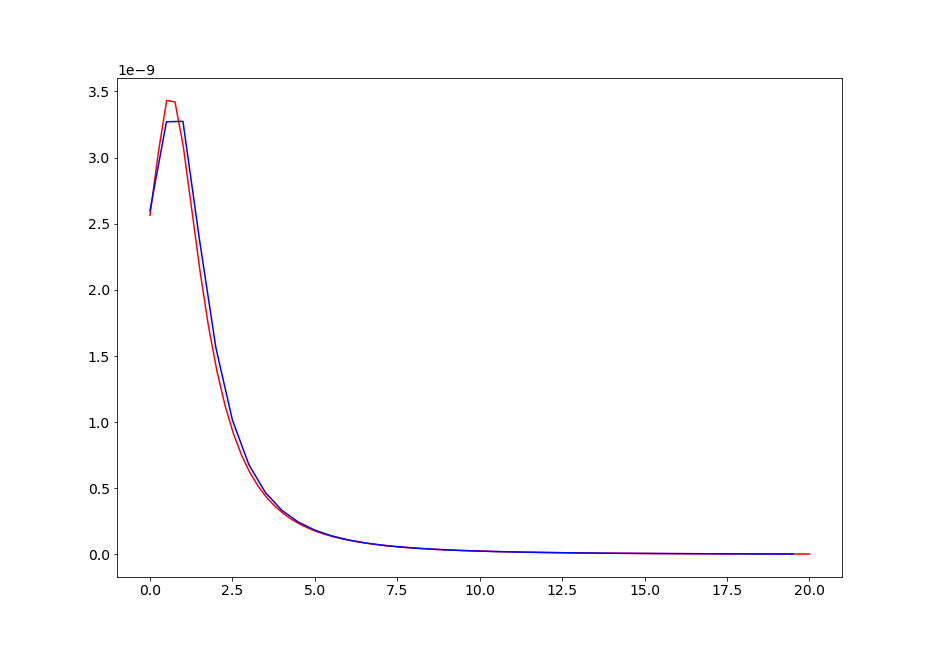

In [98]:
# Compare power dbs:

db1f = '/shared/users/asousa/WIPP/lightning_power_study/outputs/input_powers/input_energy_35_0.pklz'

with gzip.open(db1f,'r') as file:
    db1 = pickle.load(file)
    
db2f = '/shared/users/asousa/WIPP/WIPP_stencils/outputs/input_energies_0.5deg/input_energy_35_0.pklz'
with gzip.open(db2f,'r') as file:
    db2 = pickle.load(file)


    
# print db1.keys()
print db2.keys()
print db2['cfreqs']
print np.unique(np.asarray(db1.keys())[:,0])
print db2['clats']
print np.unique(np.asarray(db1.keys())[:,1])


db2key = (215, 35.5)
oldlon = db1[db2key]*pow(-10000, -2.)*2

latind = np.argmin(np.abs(db2['clats'] - 35.5)) -1
freqind = np.argmin(np.abs(db2['cfreqs'] - 215))
newlon = db2['pwr'][freqind, latind, :]

print oldlon
print newlon

plt.figure()

oldclons = np.linspace(0,20, len(oldlon))
plt.plot(oldclons, oldlon, 'r')
plt.plot(db2['clons'], newlon, 'b')

['Lshells', 'fmin', 'fieldlines', 'fmax', 'lat_hi', 'lat_low', 'freq_pairs', 'time']
['Lshells', 'fmin', 'fieldlines', 'fmax', 'lat_hi', 'lat_low', 'freq_pairs', 'time']
['x_unit_vect', 'vol', 'y_unit_vect', 'pos', 'dwh_ds', 'crossings', 'alpha_eq', 'xradius', 'stixR', 'stixP', 'hit_counts', 'alpha_lc', 'L', 'wh', 'ftc_s', 'R', 'lat', 'ftc_n', 'ds', 'stixL', 'total_vol', 'mu', 'y', 'x', 'dv_para_ds']


<IPython.core.display.Javascript object>


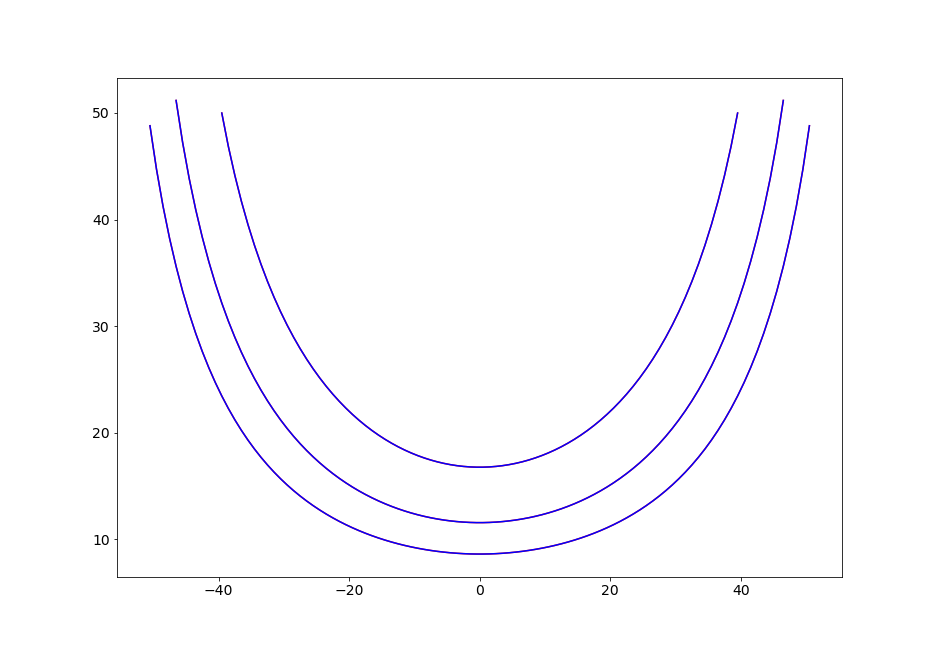

In [105]:
# Compare crossing logs. What's fucky?

with gzip.open('../outputs/crossings_ngo_psi_fixing/nightside/ngo_v2/python_data/crossing_log_lat_35-36_f_200-230.pklz','r') as file:
    oldlog = pickle.load(file)
    
with gzip.open('../outputs/crossings6/nightside/ngo_v2/python_data/crossing_log_lat_35-36_f_200-230.pklz','r') as file:
    newlog = pickle.load(file)
    
print oldlog.keys()
print newlog.keys()

# for k in ['Lshells','fmin','fmax','lat_low','lat_hi', 'freq_pairs','time']:
#     print oldlog[k]
#     print newlog[k]
print oldlog['fieldlines'][0].keys()
plt.figure()
for k in [0,1,2]:
    plt.plot(oldlog['fieldlines'][k]['lat'], oldlog['fieldlines'][k]['alpha_lc']*R2D,'r')
    plt.plot(newlog['fieldlines'][k]['lat'], newlog['fieldlines'][k]['alpha_lc']*R2D,'b')
#     plt.plot(newlog['fieldlines'][k]['L']*pow(np.cos(D2R*newlog['fieldlines'][k]['lat']),2),'b')